# Exploratory Data Analises

In [2]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install numpy
!pip3 install plotly


     |████████████████████████████████| 26.5 MB 4.8 MB/s eta 0:00:01     |██████████████████████████████▋ | 25.3 MB 6.9 MB/s eta 0:00:01


In [3]:
import numpy as np  
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = pd.read_csv("dataset/dataset.csv")

In [17]:
print(data.shape)

(23705, 5)


In [18]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [6]:
data = data.drop("img_name",axis=1)

In [7]:
data.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [24]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [146]:
def summary(data):
    print("\n Shape: ")
    print(data.shape)
    print("\n\n --------- ")
    print("\n Number of null values: ")
    print(data.isnull().sum())
    print("\n\n --------- ")
    print("\n Value count of age: ")
    print(data['age'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of ethnicity: ")
    print(data['ethnicity'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of gender: ")
    print(data['gender'].value_counts())


In [147]:
summary(data)


 Shape: 
(23705, 4)


 --------- 

 Number of null values: 
age          0
ethnicity    0
gender       0
pixels       0
dtype: int64


 --------- 

 Value count of age: 
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64


 --------- 

 Value count of ethnicity: 
0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


 --------- 

 Value count of gender: 
0    12391
1    11314
Name: gender, dtype: int64


In [8]:
columns = ["age", "gender", "ethnicity"]
y = data.drop("pixels", axis=1)
x = data.drop(columns, axis=1)


In [108]:
x.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [109]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [98]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

In [125]:
dados_plotagem_y = y

In [126]:
dados_plotagem_y.ethnicity = y.ethnicity.replace({0:"white",1:"black",2:"Asian",3:"Indian",4:"Other"})

In [127]:
dados_plotagem_y.head()

,age,ethnicity,gender
0,1,Asian,0
1,1,Asian,0
2,1,Asian,0
3,1,Asian,0
4,1,Asian,0


In [128]:
dados_plotagem_y.gender = y.gender.replace({0: "male", 1: "female"})
dados_plotagem_y.head()


,age,ethnicity,gender
0,1,Asian,male
1,1,Asian,male
2,1,Asian,male
3,1,Asian,male
4,1,Asian,male


/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

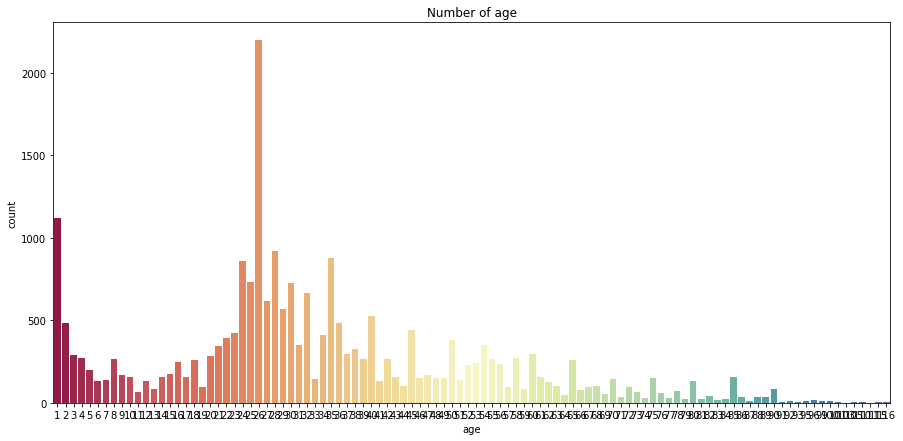

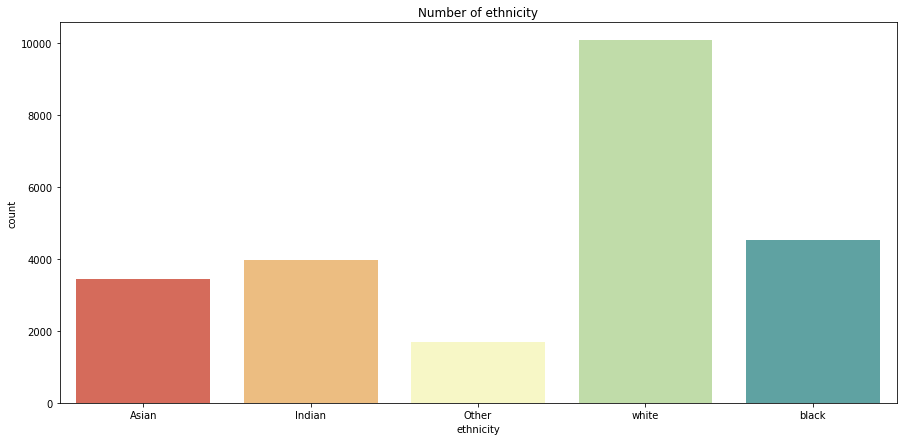

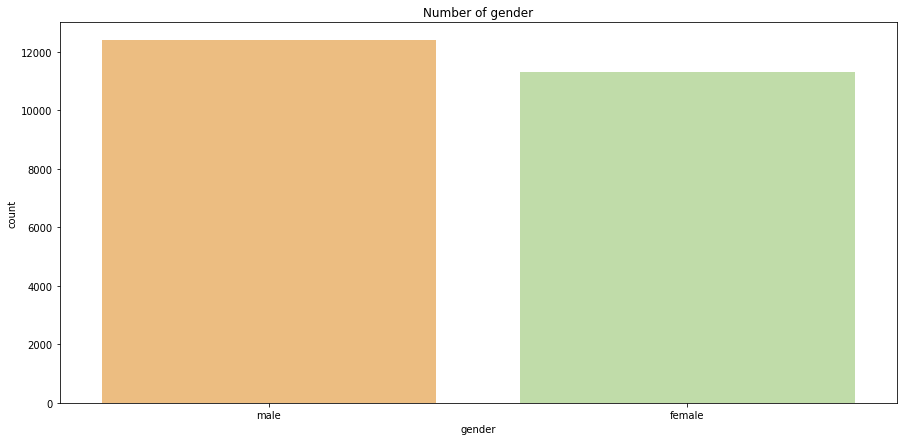

In [130]:
for i in dados_plotagem_y.columns:
    plt.figure(figsize=(15, 7))
    g = sns.countplot(y[i], palette="Spectral")
    plt.title("Number of {}".format(i))


### Image Shape

In [9]:
columns = ["age", "gender", "ethnicity"]
y = data.drop("pixels", axis=1)
x = data.drop(columns, axis=1)


In [10]:
num_pixels = len(x['pixels'][0].split(" "))
img_height = int(np.sqrt(len(x['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(x['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)


2304 48 48


In [11]:
x = pd.Series(x["pixels"])
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

# reshape data
x = x.reshape(-1, 48, 48, 1)
print("x shape: ", x.shape)


/tmp/ipykernel_126280/424062823.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))


x shape:  (23705, 48, 48, 1)


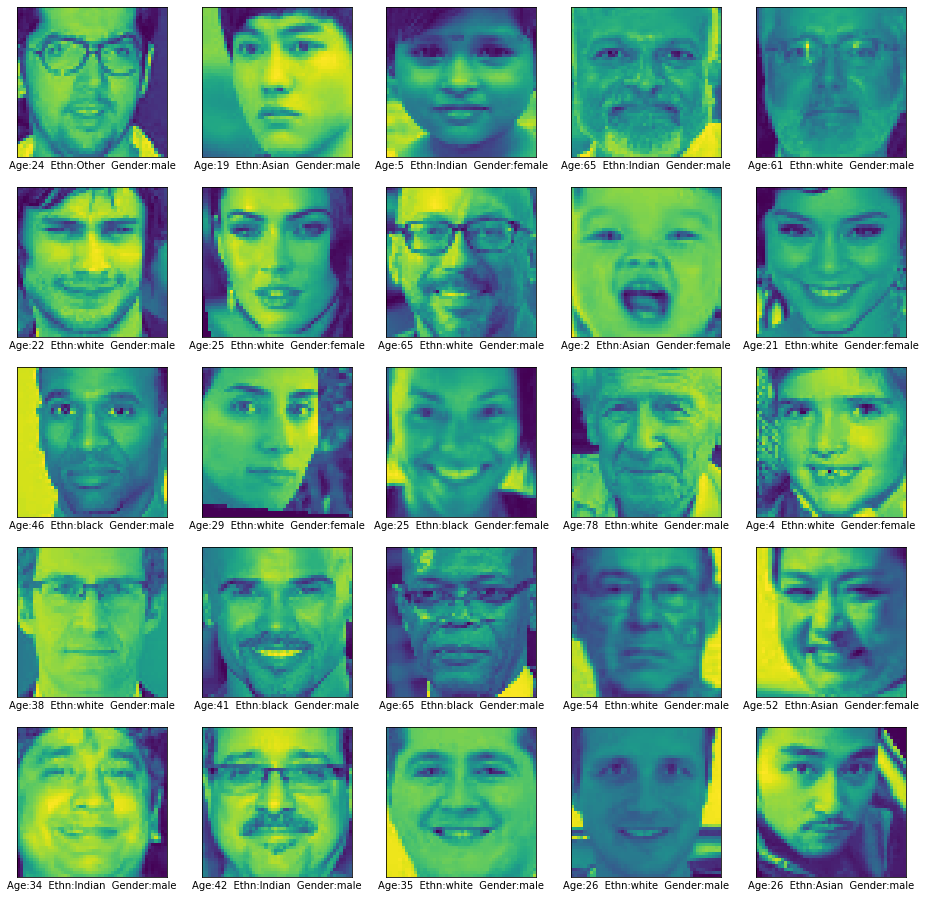

In [137]:
plt.figure(figsize=(16, 16))
for i, a in zip(np.random.randint(0, 23705, 25), range(1, 26)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.xlabel(
        "Age:"+str(y['age'].iloc[i]) +
        "  Ethn:"+str(y_for_plot['ethnicity'].iloc[i]) +
        "  Gender:" + str(y_for_plot['gender'].iloc[i])
    )
plt.show()


# Predictions

### Model for Gender prediction 

In [60]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.callbacks as callbacks
from sklearn.model_selection import train_test_split
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [61]:
y = data['gender']

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.22, random_state=37
)

In [77]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

### Sobre last-layer activation & loss function combination
https://www.dlology.com/blog/how-to-choose-last-layer-activation-and-loss-function/

In [78]:
inputShape = (48,48,1)

genderModel = tf.keras.Sequential([
    layers.InputLayer(input_shape=inputShape),
    layers.Conv2D(32,(3,3),activation='relu',input_shape = (32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate=0.3),

    layers.Dense(1, activation='sigmoid')
])

In [79]:
genderModel.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])


Depois de notar que o modelo so aprendia ate 27% meti esta funçao que para o treino ao atingir essses niveis.

In [80]:
class customStopping(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.27):
            print("\nReached 0.2700 val_loss! cancelling training!")
            self.model.stop_training = True

In [81]:
genderModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 batch_normalization_10 (Bat  (None, 46, 46, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                     

In [82]:
history = genderModel.fit(
    X_train, y_train, epochs=15, batch_size=64,validation_split=0.1, callbacks=[early_stopping],
)

Epoch 1/15
260/260 [==============================] - 21s 81ms/step - loss: 0.5198 - accuracy: 0.7435 - val_loss: 0.4193 - val_accuracy: 0.8015
Epoch 2/15
260/260 [==============================] - 20s 76ms/step - loss: 0.3791 - accuracy: 0.8309 - val_loss: 0.3888 - val_accuracy: 0.8302
Epoch 3/15
260/260 [==============================] - 19s 74ms/step - loss: 0.3302 - accuracy: 0.8553 - val_loss: 0.3340 - val_accuracy: 0.8561
Epoch 4/15
260/260 [==============================] - 20s 78ms/step - loss: 0.3020 - accuracy: 0.8687 - val_loss: 0.3083 - val_accuracy: 0.8670
Epoch 5/15
260/260 [==============================] - 19s 75ms/step - loss: 0.2834 - accuracy: 0.8795 - val_loss: 0.3088 - val_accuracy: 0.8680
Epoch 6/15
260/260 [==============================] - 20s 77ms/step - loss: 0.2711 - accuracy: 0.8846 - val_loss: 0.2957 - val_accuracy: 0.8799
Epoch 7/15
260/260 [==============================] - 22s 84ms/step - loss: 0.2515 - accuracy: 0.8924 - val_loss: 0.3297 - val_accuracy:

Gender Model Training history
Minimum validation loss: 0.2739487886428833


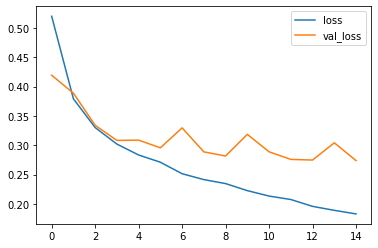

In [83]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Gender Model Training history")
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [53]:
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.492931,0.763221,0.382539,0.834505
1,0.364418,0.837921,0.353724,0.839913
2,0.324069,0.856310,0.323495,0.860465
3,0.303246,0.867308,0.315849,0.858843
4,0.286295,0.875120,0.309241,0.868037


In [86]:
from keras.models import model_from_json
gender_model_json = genderModel.to_json()
with open("gender_model.json", "w") as json_file:
    json_file.write(gender_model_json)
# serialize weights to HDF5
genderModel.save_weights("gender_model.h5")
print("Saved model to disk")

Saved model to disk


## load model from disk


In [ ]:
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")